# Oil Price Prediction Project

## Importing necessary libraries

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Part  1

#### Loading the dataset

In [250]:
df = pd.read_csv('brent_oil_weekly_30_years.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/09/2023,84.46,85.23,85.52,84.11,NaN,-0.78%
1,04/02/2023,85.12,86.00,86.44,83.50,1.29M,6.55%
2,03/26/2023,79.89,74.62,79.95,74.39,1.68M,6.53%
3,03/19/2023,74.99,73.01,77.44,70.12,1.06M,2.77%
4,03/12/2023,72.97,82.60,83.48,71.40,2.13M,-11.85%


#### Changing the type of every column to a more proper one and changing the NaN fields

In [251]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [252]:
df.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64

In [253]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [254]:
def convert_volume(val):
    if val[-1] == 'M':
        return int(float(val[:-1]) * 1000000)
    elif val[-1] == 'K':
        return int(float(val[:-1]) * 1000)
    else:
        return int(val)

In [255]:
df['Vol.'] = df['Vol.'].astype('str')
df['Vol.'][0] = '0'
df['Vol.'] = df['Vol.'].apply(convert_volume)

In [256]:
df['Vol.'][0] = int(df['Vol.'].mean())
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-04-09,84.46,85.23,85.52,84.11,601114,-0.78%
1,2023-04-02,85.12,86.00,86.44,83.50,1290000,6.55%
2,2023-03-26,79.89,74.62,79.95,74.39,1680000,6.53%
3,2023-03-19,74.99,73.01,77.44,70.12,1060000,2.77%
4,2023-03-12,72.97,82.60,83.48,71.40,2130000,-11.85%


In [257]:
df['Change %'] = pd.to_numeric(df['Change %'].str.strip('%'))
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-04-09,84.46,85.23,85.52,84.11,601114,-0.78
1,2023-04-02,85.12,86.00,86.44,83.50,1290000,6.55
2,2023-03-26,79.89,74.62,79.95,74.39,1680000,6.53
3,2023-03-19,74.99,73.01,77.44,70.12,1060000,2.77
4,2023-03-12,72.97,82.60,83.48,71.40,2130000,-11.85


#### Plot time series

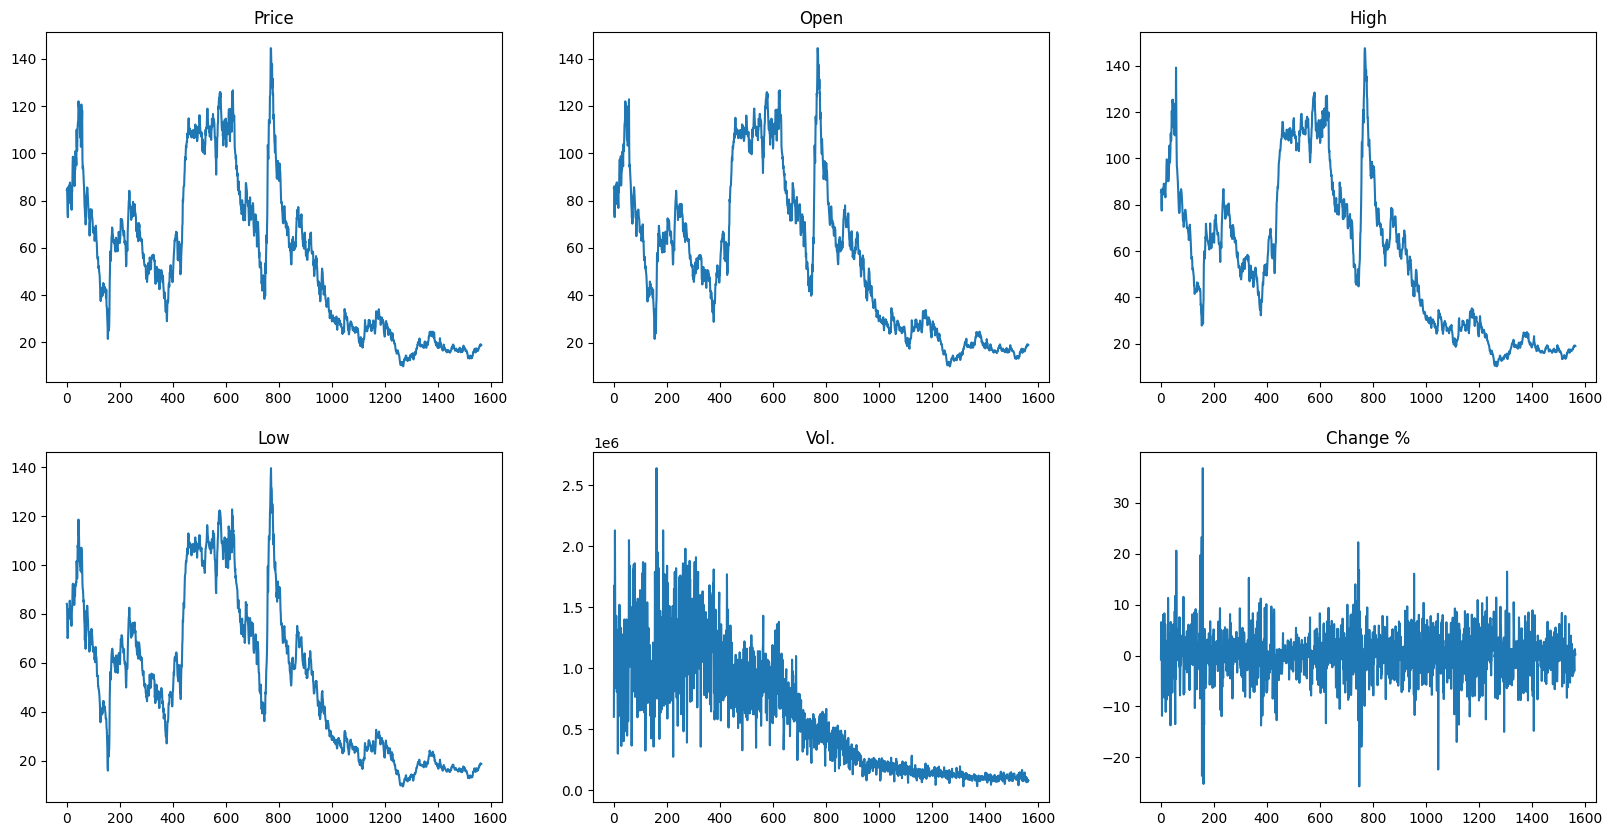

In [258]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

Feature_Names = np.array(list(df.columns[1::]))
Feature_Names = Feature_Names.reshape(2,3)

for i , feature in enumerate(df.columns[1::]):
    row = i // 3
    col = i % 3
    ax[row, col].plot(df[feature])
    ax[row, col].set_title(Feature_Names[row][col])

## Part 2

#### Function for Making new dataframe 

In [259]:
def make_time_series(df, n, m):
    df_new = pd.DataFrame()
    df_new['Date'] = df['Date']

    for i in range(1, n+1):
        df_new['Price_t-'+str(i)] = df['Price'].shift(i)
        df_new['Open_t-'+str(i)] = df['Open'].shift(i)
        df_new['High_t-'+str(i)] = df['High'].shift(i)
        df_new['Low_t-'+str(i)] = df['Low'].shift(i)
        df_new['Vol._t-'+str(i)] = df['Vol.'].shift(i)
        df_new['Change %_t-'+str(i)] = df['Change %'].shift(i)

    for i in range(1, m+1):
        df_new['Price_t+'+str(i)] = df['Price'].shift(-i)
    
    return df_new

## Part 3

#### Split train and test data 

In [260]:
test_data = df[df['Date'].dt.year >= 2019]
train_data = df[df['Date'].dt.year < 2019]

X_train = df[df['Date'].dt.year < 2019].drop('Price', axis=1)
y_train = df[df['Date'].dt.year < 2019]['Price']

X_test = df[df['Date'].dt.year >= 2019].drop('Price', axis=1)
y_test = df[df['Date'].dt.year >= 2019]['Price']

## Part 4

#### Making new datframes

In [261]:
train_data_timeSeries = make_time_series(train_data , 8, 1)
train_data_timeSeries = train_data_timeSeries.fillna(train_data_timeSeries.mean())
train_data_timeSeries.drop('Date' , axis=1 , inplace=True)

X_test_timeSeries = make_time_series(test_data, 8, 1)
X_test_timeSeries = X_test_timeSeries.fillna(X_test_timeSeries.mean())
X_test_timeSeries.drop('Date' , axis=1 , inplace=True)

In [262]:
import re

i = 0
indexes = []
for column in train_data_timeSeries.columns:
    if re.search('^Price', column):
        indexes.append(i)
    i += 1

train_data_timeSeries = train_data_timeSeries.iloc[:,indexes]
train_data_timeSeries

,Price_t-1,Price_t-2,Price_t-3,Price_t-4,Price_t-5,Price_t-6,Price_t-7,Price_t-8,Price_t+1
223,52.649449,52.674609,52.699627,52.724653,52.750157,52.775826,52.801407,52.827243,52.200000
224,57.060000,52.674609,52.699627,52.724653,52.750157,52.775826,52.801407,52.827243,53.820000
225,52.200000,57.060000,52.699627,52.724653,52.750157,52.775826,52.801407,52.827243,60.280000
226,53.820000,52.200000,57.060000,52.724653,52.750157,52.775826,52.801407,52.827243,61.670000
227,60.280000,53.820000,52.200000,57.060000,52.750157,52.775826,52.801407,52.827243,58.710000
...,...,...,...,...,...,...,...,...,...
1561,18.430000,18.600000,18.310000,17.660000,17.560000,17.450000,16.740000,16.650000,19.190000
1562,18.600000,18.430000,18.600000,18.310000,17.660000,17.560000,17.450000,16.740000,19.150000
1563,19.190000,18.600000,18.430000,18.600000,18.310000,17.660000,17.560000,17.450000,18.910000
1564,19.150000,19.190000,18.600000,18.430000,18.600000,18.310000,17.660000,17.560000,18.810000


In [263]:
import re

i = 0
indexes = []
for column in X_test_timeSeries.columns:
    if re.search('^Price', column):
        indexes.append(i)
    i += 1

X_test_timeSeries = X_test_timeSeries.iloc[:,indexes]
X_test_timeSeries

,Price_t-1,Price_t-2,Price_t-3,Price_t-4,Price_t-5,Price_t-6,Price_t-7,Price_t-8,Price_t+1
0,70.44018,70.475204,70.515364,70.550822,70.589587,70.609585,70.625741,70.651581,85.120000
1,84.46000,70.475204,70.515364,70.550822,70.589587,70.609585,70.625741,70.651581,79.890000
2,85.12000,84.460000,70.515364,70.550822,70.589587,70.609585,70.625741,70.651581,74.990000
3,79.89000,85.120000,84.460000,70.550822,70.589587,70.609585,70.625741,70.651581,72.970000
4,74.99000,79.890000,85.120000,84.460000,70.589587,70.609585,70.625741,70.651581,82.780000
...,...,...,...,...,...,...,...,...,...
218,66.25000,67.120000,65.070000,65.740000,67.160000,67.030000,68.390000,70.340000,62.750000
219,62.10000,66.250000,67.120000,65.070000,65.740000,67.160000,67.030000,68.390000,61.640000
220,62.75000,62.100000,66.250000,67.120000,65.070000,65.740000,67.160000,67.030000,62.700000
221,61.64000,62.750000,62.100000,66.250000,67.120000,65.070000,65.740000,67.160000,60.480000


#### Prediction using LinearRegression model 

In [307]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(train_data_timeSeries, y_train)

In [308]:
y_pred_lr = lr.predict(X_test_timeSeries)

In [309]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error for LinearRegression:', mean_absolute_error(y_pred_lr, y_test))
print('Mean Squared Error for LinearRegression:', mean_squared_error(y_pred_lr, y_test))

Mean Absolute Error for LinearRegression: 2.142279294934078
Mean Squared Error for LinearRegression: 9.625816980827167


#### Prediction using GradientBoostingRegressor model

In [319]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor().fit(train_data_timeSeries , y_train)

In [320]:
y_pred_gb = gb.predict(X_test_timeSeries)

In [321]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error for GradientBoostingRegressor:', mean_absolute_error(y_pred_gb, y_test))
print('Mean Squared Error for GradientBoostingRegressor:', mean_squared_error(y_pred_gb, y_test))

Mean Absolute Error for GradientBoostingRegressor: 2.2462986062860497
Mean Squared Error for GradientBoostingRegressor: 10.353657185745073


#### Prediction using SVR model

In [313]:
from sklearn.svm import SVR

svr = SVR().fit(train_data_timeSeries , y_train)

In [314]:
y_pred_svr = svr.predict(X_test_timeSeries)

In [315]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error for SVR:', mean_absolute_error(y_pred_svr, y_test))
print('Mean Squared Error for SVR:', mean_squared_error(y_pred_svr, y_test))

Mean Absolute Error for SVR: 2.7042508524468745
Mean Squared Error for SVR: 13.741329085555252


#### Prediction using DecisionTreeRegressor model

In [328]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor().fit(train_data_timeSeries , y_train)

In [329]:
y_pred_dt = dt.predict(X_test_timeSeries)

In [330]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error for DecisionTreeRegressor:', mean_absolute_error(y_pred_dt, y_test))
print('Mean Squared Error for DecisionTreeRegressor:', mean_squared_error(y_pred_dt, y_test))

Mean Absolute Error for DecisionTreeRegressor: 2.8956502242152458
Mean Squared Error for DecisionTreeRegressor: 16.057682062780266


## Part 5

#### Plotting real values and predictions for different models 

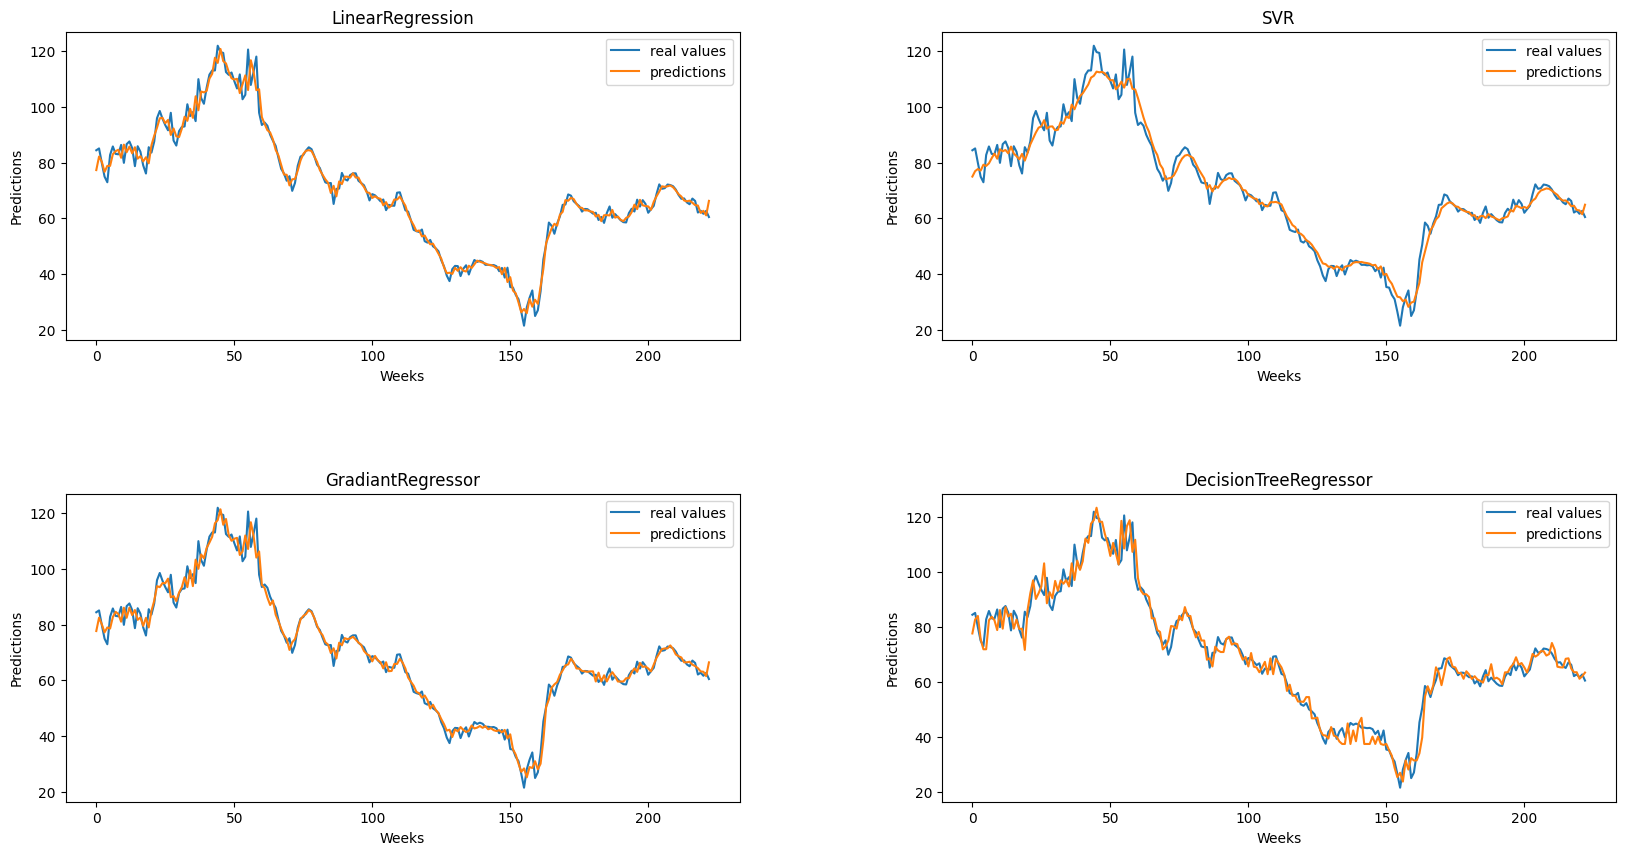

In [276]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0][0].plot(y_test, label='real values')
ax[0][0].plot(y_pred_lr, label='predictions')
ax[0][0].set_title('LinearRegression')
ax[0][0].set_xlabel('Weeks')
ax[0][0].set_ylabel('Predictions')
ax[0][0].legend()

ax[0][1].plot(y_test, label='real values')
ax[0][1].plot(y_pred_svr, label='predictions')
ax[0][1].set_title('SVR')
ax[0][1].set_xlabel('Weeks')
ax[0][1].set_ylabel('Predictions')
ax[0][1].legend()

ax[1][0].plot(y_test, label='real values')
ax[1][0].plot(y_pred_gb, label='predictions')
ax[1][0].set_title('GradiantRegressor')
ax[1][0].set_xlabel('Weeks')
ax[1][0].set_ylabel('Predictions')
ax[1][0].legend()

ax[1][1].plot(y_test, label='real values')
ax[1][1].plot(y_pred_dt, label='predictions')
ax[1][1].set_title('DecisionTreeRegressor')
ax[1][1].set_xlabel('Weeks')
ax[1][1].set_ylabel('Predictions')
ax[1][1].legend()

plt.show()

## Part 6

#### Finding the best n

In [331]:
import re

mses = []
for i in range(1,15):
    train_data_timeSeries_temp = make_time_series(train_data, i, 1)
    train_data_timeSeries_temp = train_data_timeSeries_temp.fillna(train_data_timeSeries_temp.mean())
    train_data_timeSeries_temp.drop('Date' , axis=1 , inplace=True)

    j = 0
    indexes = []
    for column in train_data_timeSeries_temp.columns:
        if re.search('^Price', column):
            indexes.append(j)
        j += 1
    
    train_data_timeSeries_temp = train_data_timeSeries_temp.iloc[:,indexes]

    X_test_timeSeries_temp = make_time_series(test_data, i, 1)
    X_test_timeSeries_temp = X_test_timeSeries_temp.fillna(X_test_timeSeries_temp.mean())
    X_test_timeSeries_temp.drop('Date' , axis=1 , inplace=True)

    j = 0
    indexes = []
    for column in X_test_timeSeries_temp.columns:
        if re.search('^Price', column):
            indexes.append(j)
        j += 1

    X_test_timeSeries_temp = X_test_timeSeries_temp.iloc[:,indexes]

    lr_temp = LinearRegression().fit(train_data_timeSeries_temp, y_train)

    y_pred_lr_temp = lr_temp.predict(X_test_timeSeries_temp)
    
    mses.append(mean_squared_error(y_pred_lr_temp, y_test))

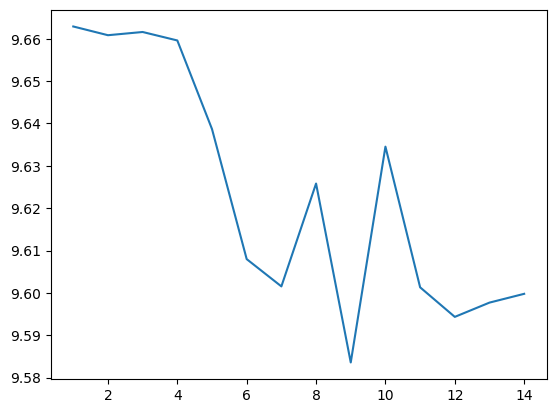

Best Score at n = 9


In [332]:
plt.plot(list(range(1, 15)), mses)
plt.show()
print(f"Best Score at n = {np.argmin(mses)+1}")

## Part 7

#### Function for Making new dataframe 

In [279]:
def make_time_series_use_all_features(df, n, m):
    df_new = pd.DataFrame()
    df_new['Date'] = df['Date']

    for i in range(1, n+1):
        df_new['Price_t-'+str(i)] = df['Price'].shift(i)
        df_new['Open_t-'+str(i)] = df['Open'].shift(i)
        df_new['High_t-'+str(i)] = df['High'].shift(i)
        df_new['Low_t-'+str(i)] = df['Low'].shift(i)
        df_new['Vol._t-'+str(i)] = df['Vol.'].shift(i)
        df_new['Change %_t-'+str(i)] = df['Change %'].shift(i)

    for i in range(1, m+1):
        df_new['Price_t+'+str(i)] = df['Price'].shift(-i)
        df_new['Open_t+'+str(i)] = df['Open'].shift(-i)
        df_new['High_t+'+str(i)] = df['High'].shift(-i)
        df_new['Low_t+'+str(i)] = df['Low'].shift(-i)
        df_new['Vol._t+'+str(i)] = df['Vol.'].shift(-i)
        df_new['Change %_t+'+str(i)] = df['Change %'].shift(-i)
    
    return df_new

#### Making new datframes

In [280]:
train_data_timeSeries2 = make_time_series_use_all_features(train_data, 9, 1)
train_data_timeSeries2 = train_data_timeSeries2.fillna(train_data_timeSeries2.mean())
train_data_timeSeries2.drop('Date' , axis=1 , inplace=True)

X_test_timeSeries2 = make_time_series_use_all_features(test_data, 9, 1)
X_test_timeSeries2 = X_test_timeSeries2.fillna(X_test_timeSeries2.mean())
X_test_timeSeries2.drop('Date' , axis=1 , inplace=True)

#### Prediction using LinearRegression model 

In [281]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression().fit(train_data_timeSeries2, y_train)

In [282]:
y_pred_lr2 = lr2.predict(X_test_timeSeries2)

In [283]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error for LinearRegression with all features:', mean_absolute_error(y_pred_lr2, y_test))
print('Mean Squared Error for LinearRegression with all features:', mean_squared_error(y_pred_lr2, y_test))

Mean Absolute Error for LinearRegression with all features: 0.6197821678874116
Mean Squared Error for LinearRegression with all features: 1.994900158157224


## Part 8

#### Finding 12 most important features using Forward Selection

In [333]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lr3 = LinearRegression()
sfs = SequentialFeatureSelector(lr3, n_features_to_select=12, direction='forward').fit(train_data_timeSeries2, y_train)

In [334]:
selected_indices = sfs.get_support(indices=True)
selected_features = list(train_data_timeSeries2.columns[selected_indices])
print(selected_features)

['Open_t-1', 'Change %_t-1', 'Price_t-2', 'High_t-2', 'Low_t-2', 'Vol._t-2', 'Price_t-5', 'Change %_t-5', 'High_t-7', 'Open_t-8', 'Price_t+1', 'Change %_t+1']


In [335]:
train_data_best_features = train_data_timeSeries2.loc[:, selected_features]
train_data_best_features

,Open_t-1,Change %_t-1,Price_t-2,High_t-2,Low_t-2,Vol._t-2,Price_t-5,Change %_t-5,High_t-7,Open_t-8,Price_t+1,Change %_t+1
223,52.63076,0.184836,52.674609,54.209433,50.963967,5.055609e+05,52.750157,0.186181,54.341153,52.807985,52.200000,-3.010000
224,53.00000,9.310000,52.674609,54.209433,50.963967,5.055609e+05,52.750157,0.186181,54.341153,52.807985,53.820000,-10.720000
225,53.49000,-3.010000,57.060000,58.310000,52.510000,1.010000e+06,52.750157,0.186181,54.341153,52.807985,60.280000,-2.250000
226,60.25000,-10.720000,52.200000,55.290000,49.930000,2.729200e+05,52.750157,0.186181,54.341153,52.807985,61.670000,5.040000
227,61.34000,-2.250000,53.820000,61.210000,52.790000,1.490000e+06,52.750157,0.186181,54.341153,52.807985,58.710000,-0.150000
...,...,...,...,...,...,...,...,...,...,...,...,...
1561,18.48000,-0.910000,18.600000,18.730000,18.310000,8.175000e+04,17.560000,-0.570000,17.780000,16.800000,19.190000,0.210000
1562,19.25000,-3.070000,18.430000,18.530000,18.100000,9.805000e+04,17.660000,-3.550000,17.730000,17.600000,19.150000,1.270000
1563,19.25000,0.210000,18.600000,19.270000,18.510000,8.964000e+04,18.310000,-1.560000,17.840000,17.650000,18.910000,0.530000
1564,18.98000,1.270000,19.190000,19.300000,18.960000,7.882000e+04,18.600000,0.920000,18.450000,17.730000,18.810000,0.210000


In [336]:
X_test_best_featues = X_test_timeSeries2.loc[:, selected_features]

In [337]:
lr_best_features = LinearRegression().fit(train_data_best_features, y_train)
y_pred_best_features = lr_best_features.predict(X_test_best_featues)

In [338]:
print('Mean Absolute Error for LinearRegression with 12 best features:', mean_absolute_error(y_pred_best_features, y_test))
print('Mean Squared Error for LinearRegression with 12 best features:', mean_squared_error(y_pred_best_features, y_test))

Mean Absolute Error for LinearRegression with 12 best features: 0.5968516630862949
Mean Squared Error for LinearRegression with 12 best features: 2.0797978591171837


## Part 9

#### Selecting 4 future weeks and 12 previous weeks from dataframe

In [290]:
df_16_Weeks = df.iloc[:16]
df_16_Weeks

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-04-09,84.46,85.23,85.52,84.11,601114,-0.78
1,2023-04-02,85.12,86.00,86.44,83.50,1290000,6.55
2,2023-03-26,79.89,74.62,79.95,74.39,1680000,6.53
3,2023-03-19,74.99,73.01,77.44,70.12,1060000,2.77
4,2023-03-12,72.97,82.60,83.48,71.40,2130000,-11.85
5,2023-03-05,82.78,85.83,86.75,80.73,1490000,-3.55
6,2023-02-26,85.83,83.19,86.00,81.73,840910,3.21
7,2023-02-19,83.16,83.15,84.30,80.40,893440,0.19
8,2023-02-12,83.00,86.51,86.95,81.80,1190000,-3.92
9,2023-02-05,86.39,79.61,86.90,79.10,1430000,8.07


In [291]:
train_data_12_weeks = df_16_Weeks.iloc[:12]
y_train_12_weeks = train_data_12_weeks['Price']
X_train_12_weeks = train_data_12_weeks.drop(['Price' , 'Date'] , axis=1)

test_data_4_weeks = df_16_Weeks.iloc[-4:]
y_test_4_weeks = test_data_4_weeks['Price']
X_test_4_weeks = test_data_4_weeks.drop(['Price' , 'Date'] , axis=1)

#### Prediction using LinearRegression

In [292]:
lr_12_weeks = LinearRegression().fit(X_train_12_weeks, y_train_12_weeks)

In [339]:
y_pred_lr_4_weeks = lr_12_weeks.predict(X_test_4_weeks)
print("Mean Squared Error With LinearRegression:", mean_squared_error(y_pred_lr_4_weeks , y_test_4_weeks))

Mean Squared Error With LinearRegression: 1.5825724944588286


#### Prediction using GradientBoostingRegressor

In [294]:
from sklearn.ensemble import GradientBoostingRegressor

gb_12_weeks = GradientBoostingRegressor().fit(X_train_12_weeks, y_train_12_weeks)

In [340]:
y_pred_gb_4_weeks = gb_12_weeks.predict(X_test_4_weeks)
print("Mean Squared Error With GradientBoostingRegressor:", mean_squared_error(y_pred_gb_4_weeks , y_test_4_weeks))

Mean Squared Error With GradientBoostingRegressor: 2.6829284531284734


#### Finding best parameters for GradientBoostingRegressor

In [296]:
from sklearn.model_selection import GridSearchCV


gb2 = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_gb = GridSearchCV(estimator=gb2 , param_grid=param_grid , cv=2 , n_jobs=-1 , verbose=1).fit(X_train_12_weeks,y_train_12_weeks)

Fitting 2 folds for each of 243 candidates, totalling 486 fits


In [297]:
gb_best = GradientBoostingRegressor(**grid_search_gb.best_params_).fit(X_train_12_weeks,y_train_12_weeks)
y_pred_gb2  = gb_best.predict(X_test_4_weeks)

In [341]:
print("Mean Squared Error With GradientBoostingRegressor after grid search:", mean_squared_error(y_test_4_weeks,y_pred_gb2))

Mean Squared Error With GradientBoostingRegressor after grid search: 2.2802173828124834


## Part 10

#### The best model:

Linear Regression

## Part 11

#### Use Empirical Mode Decomposition method for prediction

In [299]:
from PyEMD import EMD
emd = EMD()

In [300]:
imfs = emd(df['Price'].values)
short_term = imfs[0]
mid_term = imfs[1:4].sum(axis=0)
long_term = imfs[4:].sum(axis=0)

df_emd = df.copy()


In [301]:
df_emd['short_term'] = short_term
df_emd['mid_term'] = mid_term
df_emd['long_term'] = long_term

In [302]:

df_16_Weeks_emd = df_emd.iloc[:16]

train_data_12_weeks_emd = df_16_Weeks_emd.iloc[:12]
y_train_12_weeks_emd = train_data_12_weeks_emd['Price']
X_train_12_weeks_emd = train_data_12_weeks_emd.drop(['Price' , 'Date'] , axis=1)

test_data_4_weeks_emd = df_16_Weeks_emd.iloc[-4:]
y_test_4_weeks_emd = test_data_4_weeks_emd['Price']
X_test_4_weeks_emd = test_data_4_weeks_emd.drop(['Price' , 'Date'] , axis=1)

In [303]:
lr_12_weeks_emd = LinearRegression().fit(X_train_12_weeks_emd,y_train_12_weeks_emd)

y_pred_4_weeks_emd = lr_12_weeks_emd.predict(X_test_4_weeks_emd)

In [304]:
print("Mean Absolute Error With EMD:", mean_absolute_error(y_pred_4_weeks_emd , y_test_4_weeks_emd))
print ("Mean Squared Error With EMD:", mean_squared_error(y_pred_4_weeks_emd , y_test_4_weeks_emd))

Mean Absolute Error With EMD: 1.4210854715202004e-14
Mean Squared Error With EMD: 3.0292258760486853e-28


## Part 12

#### Use Model Stacking method for prediction

In [305]:
lr_ms = LinearRegression().fit(X_train_12_weeks_emd , y_train_12_weeks_emd)
dt_ms = DecisionTreeRegressor().fit(X_train_12_weeks_emd , y_train_12_weeks_emd)
gb_ms = GradientBoostingRegressor().fit(X_train_12_weeks_emd , y_train_12_weeks_emd)

lr_preds = lr_ms.predict(X_test_4_weeks_emd)
tree_preds = dt_ms.predict(X_test_4_weeks_emd)
gb_preds = gb_ms.predict(X_test_4_weeks_emd)

X_stacked = np.column_stack((lr_preds, tree_preds, gb_preds))


model_final = LinearRegression().fit(X_stacked, y_test_4_weeks_emd)

In [306]:
stacked_preds = model_final.predict(X_stacked)

print("Mean Squared Error With Model Stacking:", mean_squared_error(stacked_preds , y_test_4_weeks_emd))

Mean Squared Error With Model Stacking: 2.0194839173657902e-28
